In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [89]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',None)

In [90]:
train_df=pd.read_csv("D:\\machine learning projecsts folders\\realstate\\gurgaon_properties_cleaned_v2.csv")

In [91]:
train_df.isnull().sum()

property_type             0
society                 487
sector                    0
price                    18
rate                     18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
noOfFloor                19
facing                 1105
agePossession             0
super_built_up_area    1888
built_up_area          2070
Carpet area            1859
others                    0
pooja room                0
servant room              0
store room                0
study room                0
furnishing_type           0
luxury_score              0
dtype: int64

In [92]:
train_df.sample(4)

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
2199,Flat,godrej nature plus,sector 33,1.50,9677.0,1550.0,Super Built up area 1550(144 sq.m.),3.0,3.0,3,6,East,Under Construction,1550.0,NaN,NaN,0,0,0,0,1,0,72
1921,Flat,vatika gurgaon,sector 83,1.05,7000.0,1500.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3.0,3.0,3,3,South-West,Relatively New,1735.0,NaN,1500.0,0,0,0,1,0,0,79
1176,Flat,ansal sushant lok ci,sector 43,2.00,15151.0,1320.0,Carpet area: 1320 (122.63 sq.m.),3.0,3.0,2,1,North,Old Property,NaN,NaN,1320.0,0,0,1,0,0,1,15
2883,House,vipul tatvam villa,sector 48,8.50,26235.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4.0,2,NaN,East,Moderately Old,NaN,3240.0,NaN,0,1,1,1,0,0,88


# property type  -->

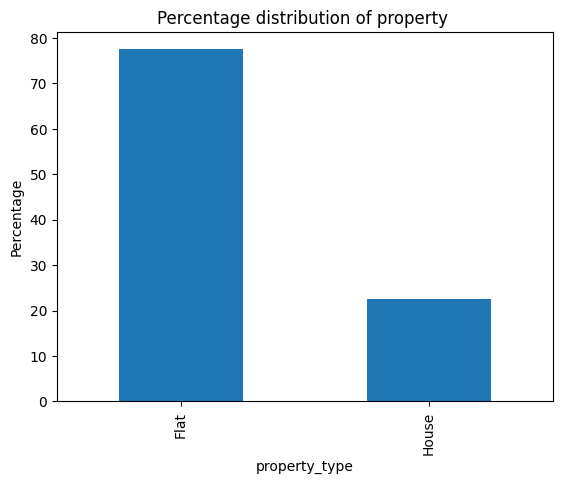

In [93]:
(train_df['property_type'].value_counts(normalize=True)*100).plot(kind='bar')
plt.ylabel('Percentage')
plt.title(f'Percentage distribution of property ')
plt.show()

# observation>
    1. flats are almost(75) percent were as the homes data is only (~23) percent
    2.no null values 

# society ->


In [94]:
train_df['society'].fillna('independent',inplace=True)

C:\Users\karan\AppData\Local\Temp\ipykernel_11056\2493648696.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['society'].fillna('independent',inplace=True)


In [95]:
train_df['society'].nunique()

675

In [96]:
train_df.society.value_counts()

society
independent                                          487
tulip violet                                          75
ss the leaf                                           74
shapoorji pallonji joyville gurugram                  45
dlf new town heights                                  42
signature global park                                 37
shree vardhman victoria                               35
smart world orchard                                   33
smart world gems                                      33
emaar mgf emerald floors premier                      32
dlf the ultima                                        31
paras dews                                            31
m3m woodshire                                         30
dlf regal gardens                                     30
shree vardhman flora                                  29
la vida by tata housing                               28
signature global solera                               27
godrej nature plus     

In [97]:
train_df.society.isnull().sum()

np.int64(0)

In [98]:
train_df[train_df['society']!='independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.022618
ss the leaf                             0.044934
shapoorji pallonji joyville gurugram    0.058504
dlf new town heights                    0.071170
signature global park                   0.082328
shree vardhman victoria                 0.092883
smart world gems                        0.102835
smart world orchard                     0.112786
emaar mgf emerald floors premier        0.122437
dlf the ultima                          0.131785
paras dews                              0.141134
dlf regal gardens                       0.150181
m3m woodshire                           0.159228
shree vardhman flora                    0.167973
la vida by tata housing                 0.176417
signature global solera                 0.184560
godrej nature plus                      0.192702
emaar gurgaon greens                    0.200241
bptp terra                              0.207780
tata primanti                           0.215018
experion the

In [99]:
society_counts = train_df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': np.int64(1),
 'High (50-100)': np.int64(2),
 'Average (10-49)': np.int64(97),
 'Low (2-9)': np.int64(285),
 'Very Low (1)': np.int64(290)}

<Axes: xlabel='society'>

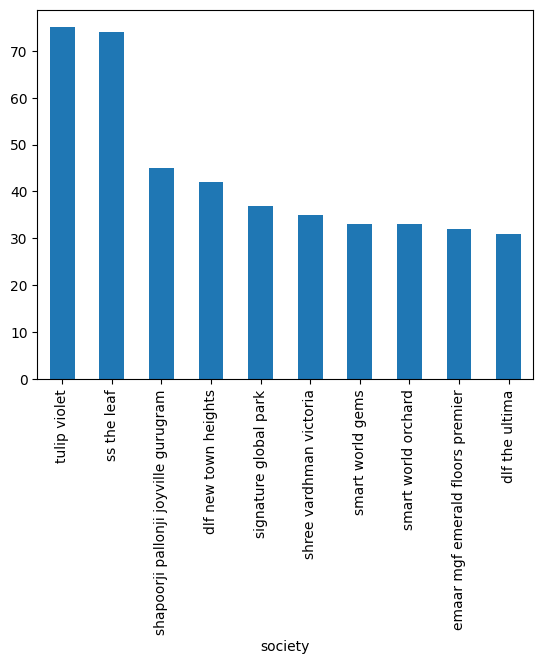

In [100]:
(train_df[train_df['society']!='independent']['society'].value_counts().head(10).plot(kind='bar'))

> # observation :
   1. there is almost(~13 ) of the data with independent society 
   2. there is 675 diifrent types of society avalable 
   3. the top 75 society covers the 50 % of the data while rest 50 with 600
   4. 'Very High (>100)': np.int64(1),
 <!--  -->
         'High (50-100)': np.int64(2),
<!--  -->
         'Average (10-49)': np.int64(97),
<!--  -->
         'Low (2-9)': np.int64(285),
<!--  -->
         'Very Low (1)': np.int64(290)

# sector 

In [101]:
train_df['sector'].isnull().sum()

np.int64(0)

In [102]:
train_df['sector'].value_counts()

sector
sohna road                    163
sector 102                    112
sector 85                     110
sector 92                     104
sector 69                      94
sector 90                      91
sector 81                      90
sector 65                      90
sector 109                     88
sector 79                      80
sector 33                      74
sector 104                     73
sector 83                      69
sector 86                      67
sector 37d                     67
sector 43                      67
sector 95                      66
sector 89                      64
sector 50                      64
sector 2                       63
sector 107                     60
sector 108                     59
sector 56                      57
sector 48                      55
sector 70a                     54
sector 37c                     53
sector 70                      52
sector 84                      51
sector 26                      49
sector 

In [103]:
train_df['sector'].nunique()

115

In [104]:
train_df['sector'].value_counts(normalize=True).cumsum().head(24)

sector
sohna road    0.042861
sector 102    0.072311
sector 85     0.101236
sector 92     0.128583
sector 69     0.153300
sector 90     0.177229
sector 81     0.200894
sector 65     0.224560
sector 109    0.247699
sector 79     0.268735
sector 33     0.288194
sector 104    0.307389
sector 83     0.325532
sector 86     0.343150
sector 37d    0.360768
sector 43     0.378385
sector 95     0.395740
sector 89     0.412569
sector 50     0.429398
sector 2      0.445964
sector 107    0.461741
sector 108    0.477255
sector 56     0.492243
sector 48     0.506705
Name: proportion, dtype: float64

<Axes: xlabel='sector'>

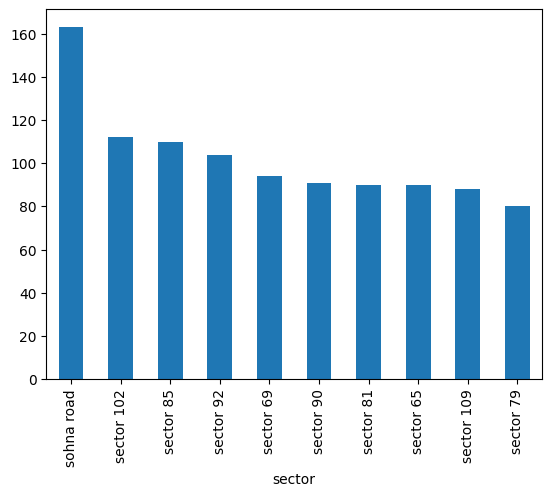

In [105]:
(train_df['sector'].value_counts().head(10)).plot(kind='bar')

In [106]:
sector_counts = train_df['sector'].value_counts()
#   frequency dstribution : for sector 
sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': np.int64(4),
 'High (50-100)': np.int64(24),
 'Average (10-49)': np.int64(63),
 'Low (2-9)': np.int64(23),
 'Very Low (1)': np.int64(1)}

 ># observation :
 1. there is no null value in the data 
 2. there are 115 nuique value for the sector column
 3. first 24 sector covers the 50 percent of the data and the rest is covered by the 91 sectors 
 4. {'Very High (>100)': np.int64(4),
 <!--  -->
 >'High (50-100)': np.int64(24),
 <!--  -->
 >'Average (10-49)': np.int64(63),
 <!--  -->
 >Low (2-9)': np.int64(23),
 <!--  -->
> 'Very Low (1)': np.int64(1)}

In [107]:
train_df.sample()

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
3690,Flat,shree arihant apartment,sector 54,1.5,8108.0,1850.0,Super Built up area 1850(171.87 sq.m.)Built Up...,3.0,3.0,3+,4,West,Moderately Old,1850.0,1700.0,1550.0,0,1,0,0,0,2,75


# price

In [108]:
train_df['price'].isnull().sum()

np.int64(18)

In [109]:
train_df['price'].describe()
# in crores 

count    3785.000000
mean        2.505804
std         2.950121
min         0.070000
25%         0.940000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

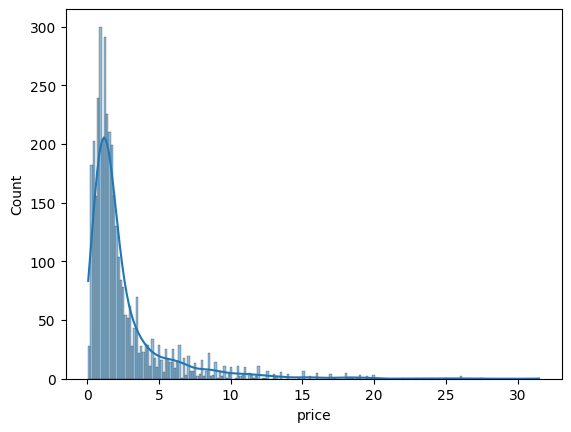

In [110]:
sns.histplot(train_df['price'],kde=True,bins=200)

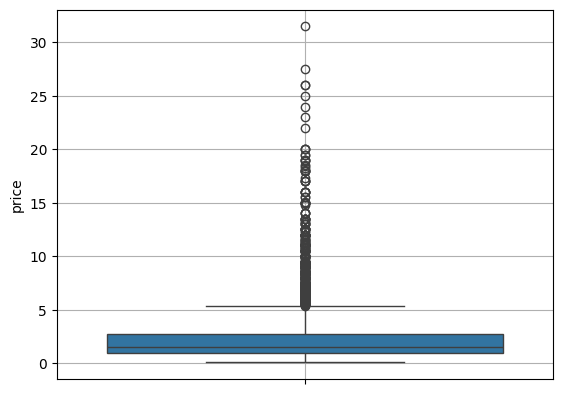

In [111]:
sns.boxplot(train_df['price'])
plt.grid()

In [112]:
print(f"skeewness of  the data is {train_df['price'].std()}")
print(f" kutos of the data id {train_df['price'].kurt()}")

skeewness of  the data is 2.9501211846379447
 kutos of the data id 15.257818585808831


># observation :
1. there are  18 null values in the data
2. the mean is about 2.5 cr
3. std is almost to 3 indecating a right skweenes in the data 
4. the max is 31 cr 
5. minimum 70 lacks 
6. and 25 is 94 lacks 
7. 50 is 1.5 cr
8. 75 is 2.7 cr

> visiualization
 1. the data is right skweed . the most of the property are listed with the lower bound of 5 cr and some of them are above 10 cr
 2. in the box plot it shows there are significant number of outliers in the data .with the IQR is from (94lac to 2.7cr)
 3. properties above 12 cr may be consider as the outliers 
> skweenes and kutos 
1. skweenes :Is the data symmetric, or tilted to one side.Which side is the tail on?
2. kutos : how heavy the tail is (outliers )
Mesokurtic (≈ 3) → normal distribution

Leptokurtic (> 3)

Heavy tails

More extreme outliers

Platykurtic (< 3)

Light tails

Fewer outliers



<Axes: xlabel='price'>

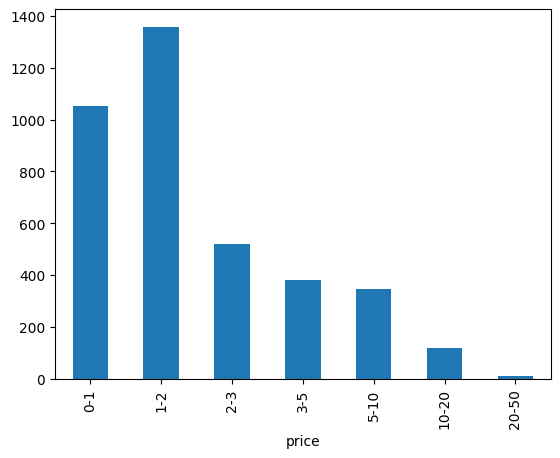

In [113]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(train_df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

> there is maximum number of properties lies between the 1-2 cr 
<!--  -->
> large numbreo f property drop above the size of 5 cr

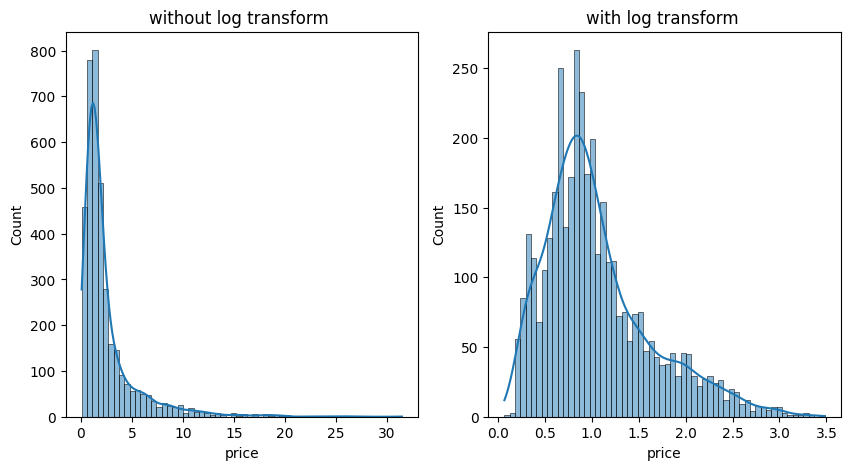

In [114]:
# ploting histplot 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(train_df['price'],kde=True,bins=60)
plt.title("without log transform ")

plt.subplot(1,2,2)
sns.histplot(np.log1p(train_df['price']),kde=True,bins=60)
plt.title("with log transform ")
plt.show()

we used the log1p because there were many values inthe orignal data that were close to the value of zero to reduce the risk of error as log
canot handel 0 we use log1p which basicly means(1+x)
.as it is seen clearly that the value with log transform is more distributed with respecet to the orignal data 


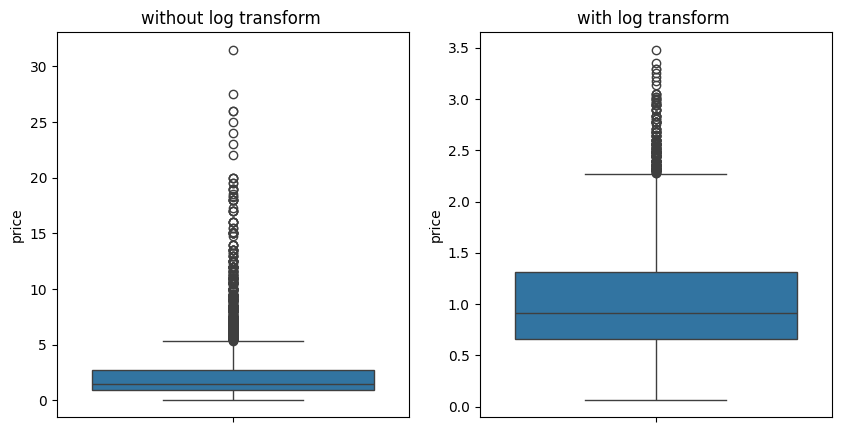

In [115]:
# ploting the box plot with the help of log 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
# sns.histplot(train_df['price'],kde=True,bins=60)
sns.boxplot(train_df['price'])
plt.title("without log transform ")

plt.subplot(1,2,2)
# sns.histplot(np.log1p(train_df['price']),kde=True,bins=60)
sns.boxplot(np.log1p(train_df['price']))
plt.title("with log transform ")
plt.show()

In [116]:
train_df.sample()

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
1405,Flat,pareena laxmi apartments,sector 99a,0.32,5521.0,580.0,Super Built up area 575(53.42 sq.m.)Carpet are...,2.0,2.0,1,2,NaN,New Property,575.0,NaN,570.17,0,0,0,0,0,0,43


# rate 


In [117]:
train_df['rate'].isnull().sum()

np.int64(18)

In [118]:
train_df['rate'].describe()

count      3785.000000
mean      13800.167768
std       23052.005585
min           4.000000
25%        6808.000000
50%        9000.000000
75%       13765.000000
max      600000.000000
Name: rate, dtype: float64

<Axes: xlabel='rate', ylabel='Count'>

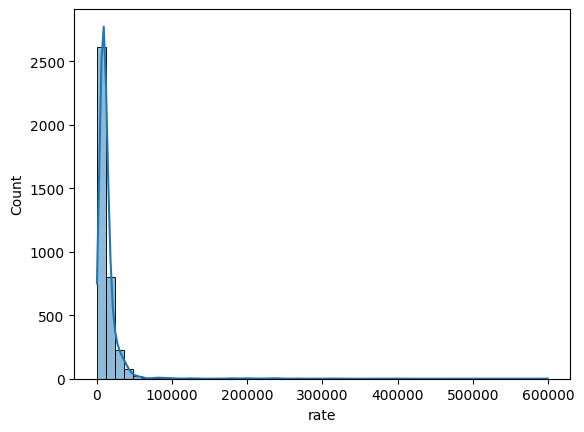

In [119]:
sns.histplot(train_df['rate'],kde=True,bins=50)

<Axes: ylabel='rate'>

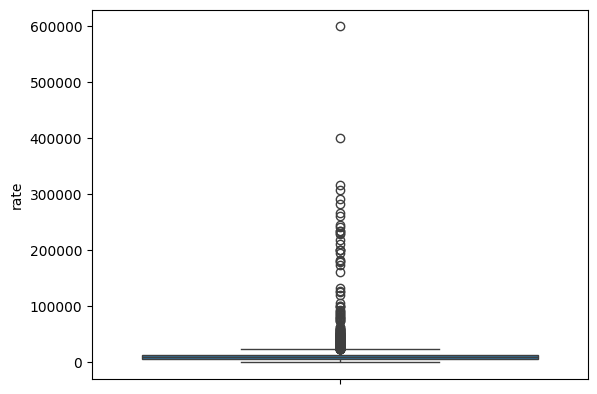

In [120]:
sns.boxplot(train_df['rate'])

In [121]:
print(f"skweeness of model {train_df['rate'].std()}")
print(f"krutos of model {train_df['rate'].kurt()}")

skweeness of model 23052.005584971404
krutos of model 187.04186603461417


> observation:
1. there are 18 null values
2. mean of the data is 13000 aprrox
3. the min values is 4 rupes/sq.feet 
4. the max vaue is 6lac /sq.feet 
5. the 75 % of the data is also approx to 13000
6. the error in the mean coud be due to the value change inthe max value of 6 lac 

> visualiztion :
 1. the histogram is right skweed and the tail is also heavy 
 2. most of the property lies btween 0-40,000
 3. there is large amout of error in the data above the lac of price for per sqfeet
 4. indecating the potential outliers int he data  


In [122]:
train_df.sample()

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
2357,Flat,m3m golfestate,sector 65,5.2,17455.0,2979.0,Super Built up area 2979(276.76 sq.m.),3.0,3.0,3,18,North,Relatively New,2979.0,NaN,NaN,0,0,1,0,1,2,76


># bedroom

In [123]:
train_df['bedRoom'].isnull().sum()

np.int64(0)

In [124]:
train_df['bedRoom'].describe()

count    3803.000000
mean        3.338154
std         1.876734
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [125]:
train_df['bedRoom'].value_counts()

bedRoom
3.0     1545
2.0      993
4.0      676
5.0      213
1.0      130
6.0       75
9.0       41
8.0       30
7.0       28
12.0      28
10.0      20
16.0      12
13.0       4
19.0       2
18.0       2
21.0       1
11.0       1
20.0       1
14.0       1
Name: count, dtype: int64

<Axes: xlabel='bedRoom'>

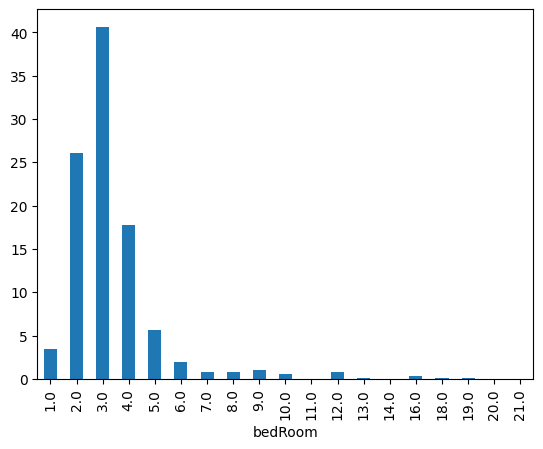

In [126]:
(train_df['bedRoom'].value_counts(normalize=True).sort_index()*100).plot(kind='bar')

<Axes: ylabel='bedRoom'>

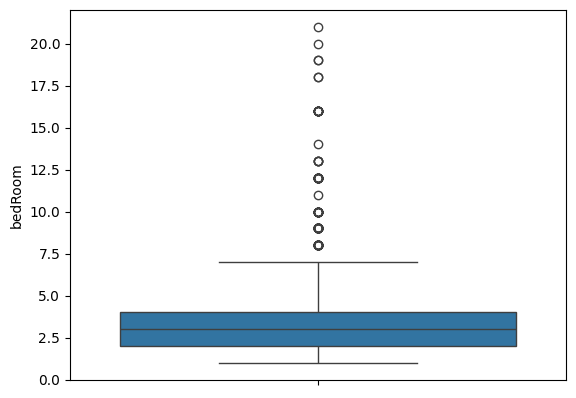

In [127]:
sns.boxplot(train_df['bedRoom'])

<Axes: ylabel='proportion'>

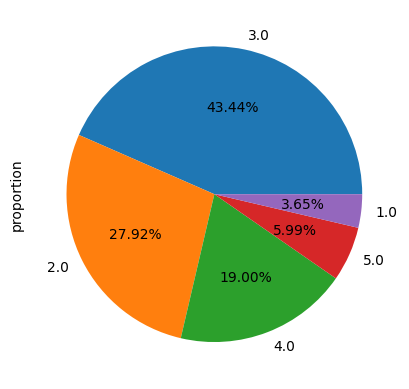

In [128]:
train_df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [129]:
train_df[(train_df['bedRoom']>8)].shape

(113, 23)

> observation :
1. there is no null value in the data 
2. the mean is 3 bedroom 
3. the max is 21 bed rooms can be a outlers 
4. iqr of the data is from 2 bed froom to 3 bed rooms

>visulization :
 1. the data shows there is (40%)of 3b then followed by 2b(26%) and then 4b and then 5b
 2. there are verly less number of property with bedroom above 7 
 3. bedroom above 12 can be considers as the potential outliers in the data 
 

In [130]:
train_df.sample()

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
2145,Flat,vatika city,sector 49,1.79,12785.0,1400.0,Carpet area: 1400 (130.06 sq.m.),3.0,3.0,3,9,NaN,Old Property,NaN,NaN,1400.0,0,0,1,0,0,0,38


># bathroom

In [131]:
train_df['bathroom'].isnull().sum()

np.int64(0)

In [132]:
train_df['bedRoom'].describe()

count    3803.000000
mean        3.338154
std         1.876734
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [133]:
train_df['bathroom'].value_counts()

bathroom
3.0     1112
2.0     1105
4.0      839
5.0      299
1.0      160
6.0      120
9.0       41
7.0       41
8.0       26
12.0      22
10.0       9
16.0       8
13.0       4
11.0       4
18.0       4
20.0       3
17.0       3
14.0       2
21.0       1
Name: count, dtype: int64

<Axes: xlabel='bedRoom'>

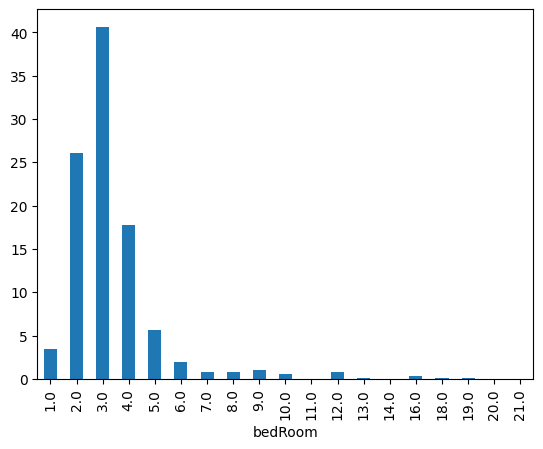

In [134]:
((train_df['bedRoom'].value_counts(normalize=True).sort_index())*100).plot(kind='bar')

<Axes: ylabel='bathroom'>

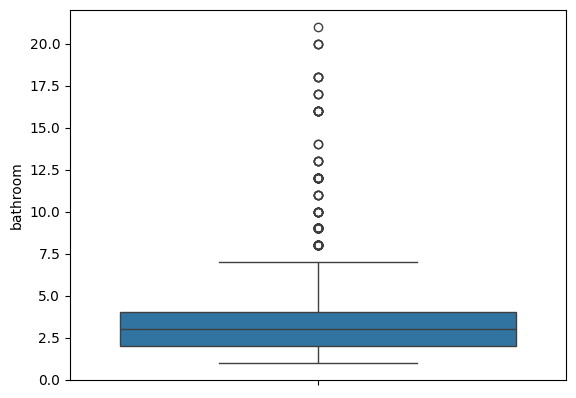

In [135]:
sns.boxplot(train_df['bathroom'])

<Axes: ylabel='proportion'>

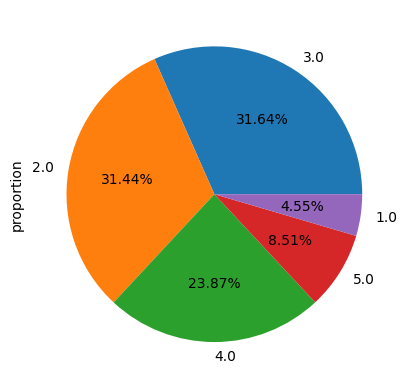

In [136]:
train_df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

> observation :
1. there is no null value in the data 
2. the mean is 3 
3. the max is 21 bathrooms can be a outlers 
4. iqr of the data is from 2 froom to 3  rooms

>visulization :
 1. the data shows there is (40%)of 3b then followed by 2b(26%) and then 4b and then 5b
 2. there are verly less number of property with bedroom above 7 
 3. bathroom above 12 can be considers as the potential outliers in the data 
 4. the top 5 bathroom types are 3>2>4>5>1
 

In [137]:
train_df.sample()

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
1142,Flat,ashiana mulberry,sohna road,0.9,6143.0,1465.0,Super Built up area 1465(136.1 sq.m.)Built Up ...,2.0,2.0,3+,7,North-East,Moderately Old,1465.0,1100.0,1000.0,0,0,0,0,1,2,156


># balcony


In [138]:
train_df['balcony'].isnull().sum()

np.int64(0)

In [139]:
train_df['balcony'].value_counts()

balcony
3+    1202
3     1110
2      925
1      376
No     190
Name: count, dtype: int64

<Axes: xlabel='balcony'>

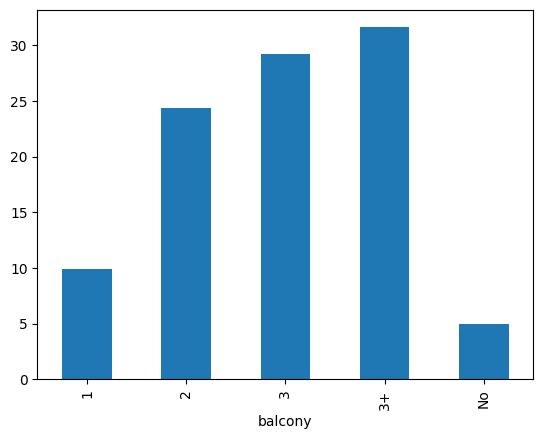

In [140]:
(train_df['balcony'].value_counts(normalize=True).sort_index()*100).plot(kind='bar')

># observation
1. there is no null value in the data 
2. there are 4 types of data present the column and is consider as object column
3. there are more number of property with 3+ balcony 
4. there are very few with no balcony 

In [141]:
train_df.iloc[:1,10:]

,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
0,12,NaN,Relatively New,NaN,NaN,1967.0,0,0,0,0,0,0,79


># noofFloor

In [142]:
train_df['noOfFloor'].isnull().sum()

np.int64(19)

In [143]:
train_df['noOfFloor']=train_df['noOfFloor'].astype(float)

In [144]:
train_df['noOfFloor'].describe()

count    3784.000000
mean        6.807082
std         6.031400
min        -2.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: noOfFloor, dtype: float64

<Axes: xlabel='noOfFloor'>

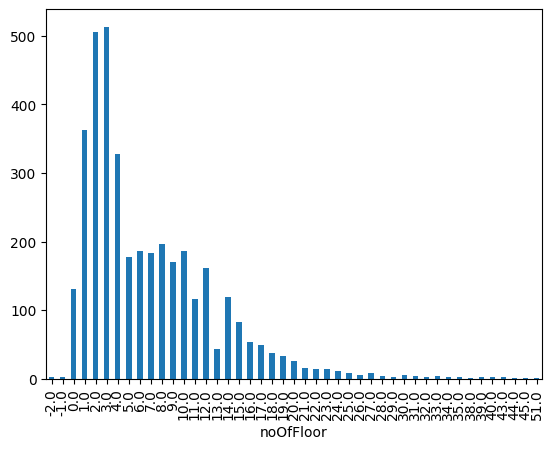

In [145]:
train_df['noOfFloor'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='noOfFloor'>

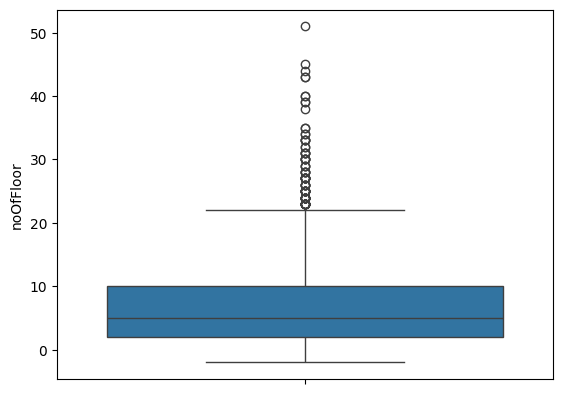

In [146]:
sns.boxplot(train_df['noOfFloor'])

> # observation
1. The majority of the properties lie between the ground floor (0) and the 25th floor.
2. Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
3. There are a few properties located at higher floors, but their frequency is much lower.
4. The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
5. Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

In [147]:
train_df.iloc[:1,11:]

,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
0,NaN,Relatively New,NaN,NaN,1967.0,0,0,0,0,0,0,79


> # facing 

In [148]:
train_df['facing'].isnull().sum()

np.int64(1105)

In [149]:
train_df['facing'].value_counts()

facing
East          642
North-East    639
North         398
West          255
South         233
North-West    200
South-East    174
South-West    157
Name: count, dtype: int64

In [150]:
train_df['facing'].fillna('NA',inplace=True)

C:\Users\karan\AppData\Local\Temp\ipykernel_11056\2173857948.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['facing'].fillna('NA',inplace=True)


In [151]:
train_df['facing'].isnull().sum()

np.int64(0)

<Axes: xlabel='facing'>

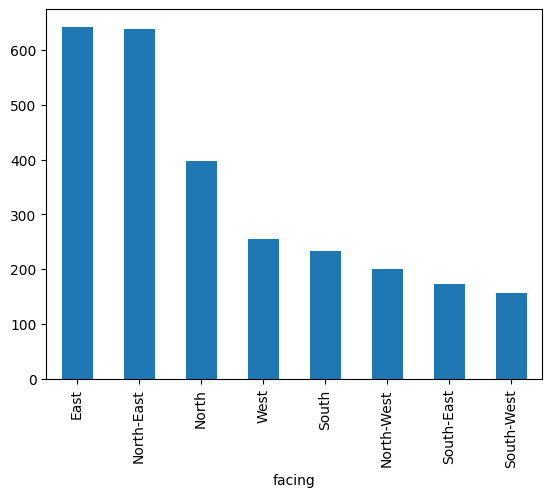

In [152]:
(train_df[train_df['facing']!='NA']['facing'].value_counts().head(10).plot(kind='bar'))

> # observation
1. there are no null values in the data 
2. there are total of 8 direction avalale 
3. thre are more propety with east and nort east facing follwed by nort and west 
4. there are total of 1104 propety with not avalable facing 

> # agePossession


In [153]:
train_df['agePossession'].isnull().sum()

np.int64(0)

In [154]:
train_df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

<Axes: xlabel='agePossession'>

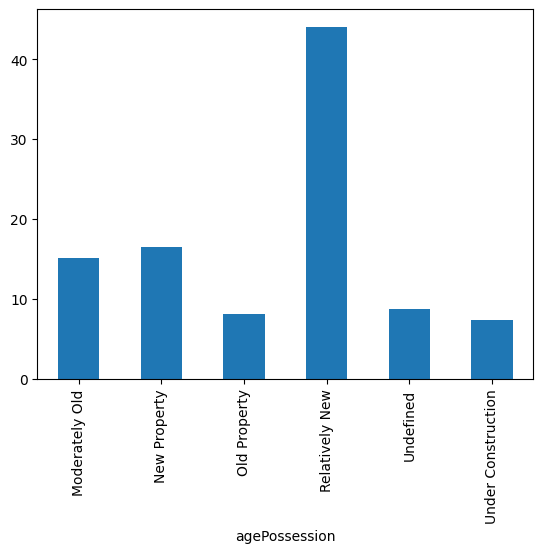

In [155]:
((train_df['agePossession'].value_counts(normalize=True).sort_index())*100).plot(kind='bar')

In [156]:
train_df[train_df['agePossession']=='Undefined'].head()

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
18,House,independent,sector 13,2.25,6944.0,3240.0,Carpet area: 360 (301.01 sq.m.),10.0,10.0,2,1.0,East,Undefined,NaN,NaN,360.0,0,0,0,0,0,0,0
30,Flat,residency grand,sector 52,5.00,9615.0,5200.0,Built Up area: 5200 (483.1 sq.m.),5.0,5.0,3+,2.0,East,Undefined,NaN,5200.0,NaN,0,0,0,0,0,0,0
47,Flat,godrej air,sector 85,1.75,9589.0,1825.0,Built Up area: 1825 (169.55 sq.m.),3.0,3.0,2,27.0,NA,Undefined,NaN,1825.0,NaN,0,0,0,0,0,0,44
51,Flat,smart world gems,sector 89,1.71,12000.0,1425.0,Built Up area: 1423 (132.2 sq.m.),3.0,2.0,No,3.0,NA,Undefined,NaN,1423.0,NaN,0,0,0,0,0,0,45
54,Flat,trisara our homes 3,sohna road,0.21,4339.0,484.0,Built Up area: 484 (44.97 sq.m.),1.0,1.0,No,2.0,NA,Undefined,NaN,484.0,NaN,0,0,0,0,0,0,0


> # observation 
1. there are no  null value 
2. thre is more properties of relative new 
3. thre are property with unefine and the numberof rooms are not avalabele as well as the luxy score are more 

> # super_buit up area 

In [157]:
train_df['super_built_up_area'].isnull().sum()

np.int64(1888)

In [158]:
train_df['super_built_up_area'].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

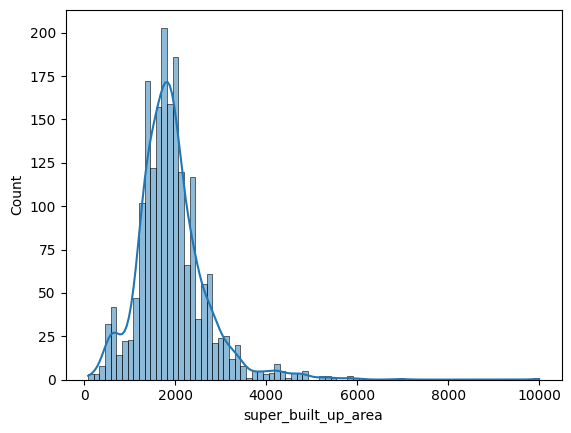

In [159]:
sns.histplot(train_df['super_built_up_area'],bins=80,kde=True)

<Axes: ylabel='super_built_up_area'>

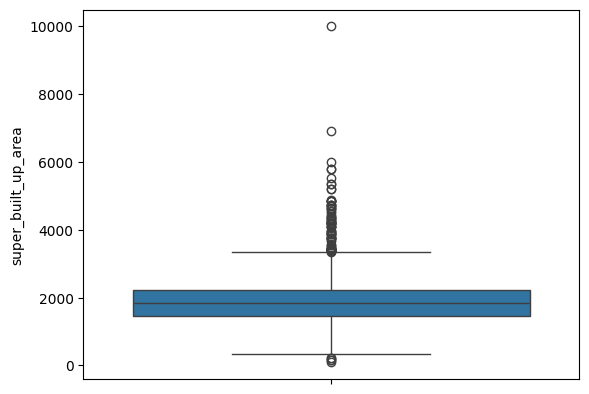

In [160]:
sns.boxplot(train_df['super_built_up_area'])

> # observation
1. there are many null values in the data 
2.  mean      1921.658251
    std        767.160169
    min         89.000000
    25%       1457.000000
    50%       1828.000000
    75%       2215.000000
    max      10000.000000
3. the min and max can be consider to think 
4. due to increse inthe area 10000 the data is right skweed  and have potential outliers
5. the ior range lies between 1457 to 2215.
6. there is posiiblety of partial outliers above the 5000 area

> # built up area

In [161]:
train_df.sample(4)

,property_type,society,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,noOfFloor,facing,agePossession,super_built_up_area,built_up_area,Carpet area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
2510,House,independent,sector 57,7.25,26852.0,2700.0,Plot area 300(250.84 sq.m.),9.0,9.0,3+,2.0,North-East,New Property,NaN,2700.0,NaN,1,1,1,0,0,2,49
836,Flat,indiabulls centrum park,sector 103,2.40,8347.0,2875.0,Super Built up area 2875(267.1 sq.m.)Built Up ...,4.0,6.0,3+,15.0,North-East,Relatively New,2875.0,2456.0,2100.0,0,0,1,0,0,0,156
2421,Flat,ramprastha the atrium,sector 37d,1.00,7782.0,1285.0,Super Built up area 1285(119.38 sq.m.),3.0,3.0,2,4.0,NA,Relatively New,1285.0,NaN,NaN,0,0,0,0,0,0,13
1440,Flat,shri ram apartments,sector 4,0.32,3368.0,950.0,Carpet area: 950 (88.26 sq.m.),2.0,2.0,1,4.0,NA,Relatively New,NaN,NaN,950.0,0,0,0,0,0,2,7


In [162]:
train_df['built_up_area'].isnull().sum()

np.int64(2070)

In [164]:
train_df['built_up_area'].describe()

count      1733.000000
mean       2360.241413
std       17719.603378
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2399.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

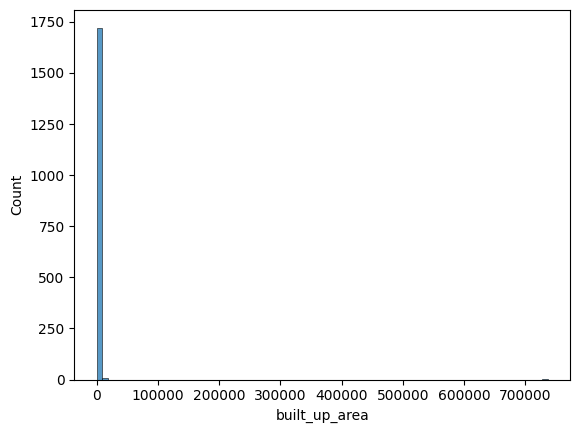

In [165]:
sns.histplot(train_df['built_up_area'])

<Axes: ylabel='built_up_area'>

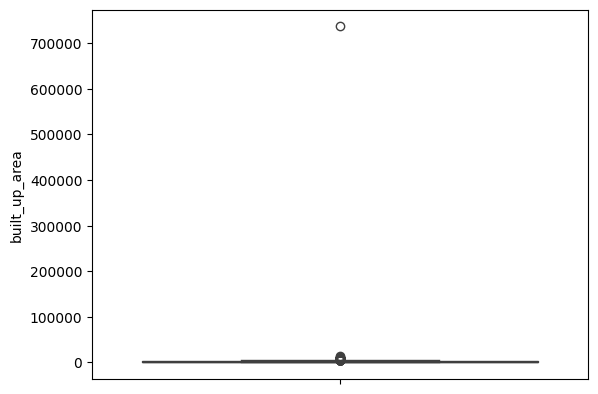

In [166]:
sns.boxplot(train_df['built_up_area'])

> # observation 
1. there area some null values 
2. there is a max of 7 lac built up area which is kind a dout
3. due to which the graph is right skweed 
4. there are potential outliers in the data 

he presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

# carpet area


In [167]:
train_df['Carpet area'].isnull().sum()

np.int64(1859)

In [168]:
train_df['Carpet area'].describe()

count      1944.000000
mean       2483.466943
std       22375.239293
min          15.000000
25%         824.000000
50%        1294.000000
75%        1786.250000
max      607936.000000
Name: Carpet area, dtype: float64

<Axes: xlabel='Carpet area', ylabel='Count'>

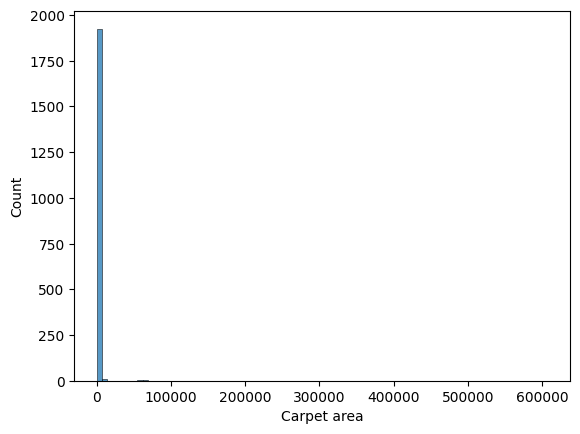

In [169]:
sns.histplot(train_df['Carpet area'])

<Axes: ylabel='Carpet area'>

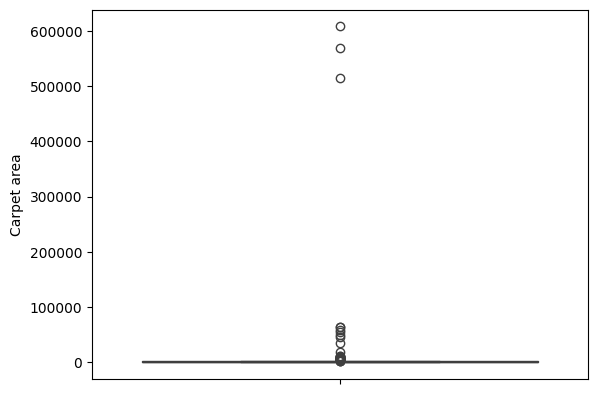

In [170]:
sns.boxplot(train_df['Carpet area'])

# observation
1. THERE ARE MANY NULL VALUE 
2. DUE TO THE INCRESEIN THE E NUMBER MAY BE THE IS THE CAUSE OF THE RIGHT SKWEENES OF THE MODEL
3. THERE ARE POTENTIAL OUTLIER INTHE DATA WITH DATA ABOVE IN LACS 

THE INCRES INTHE DATA BE CAUSE FROM THE DATA ERRORS IN THE DATA 

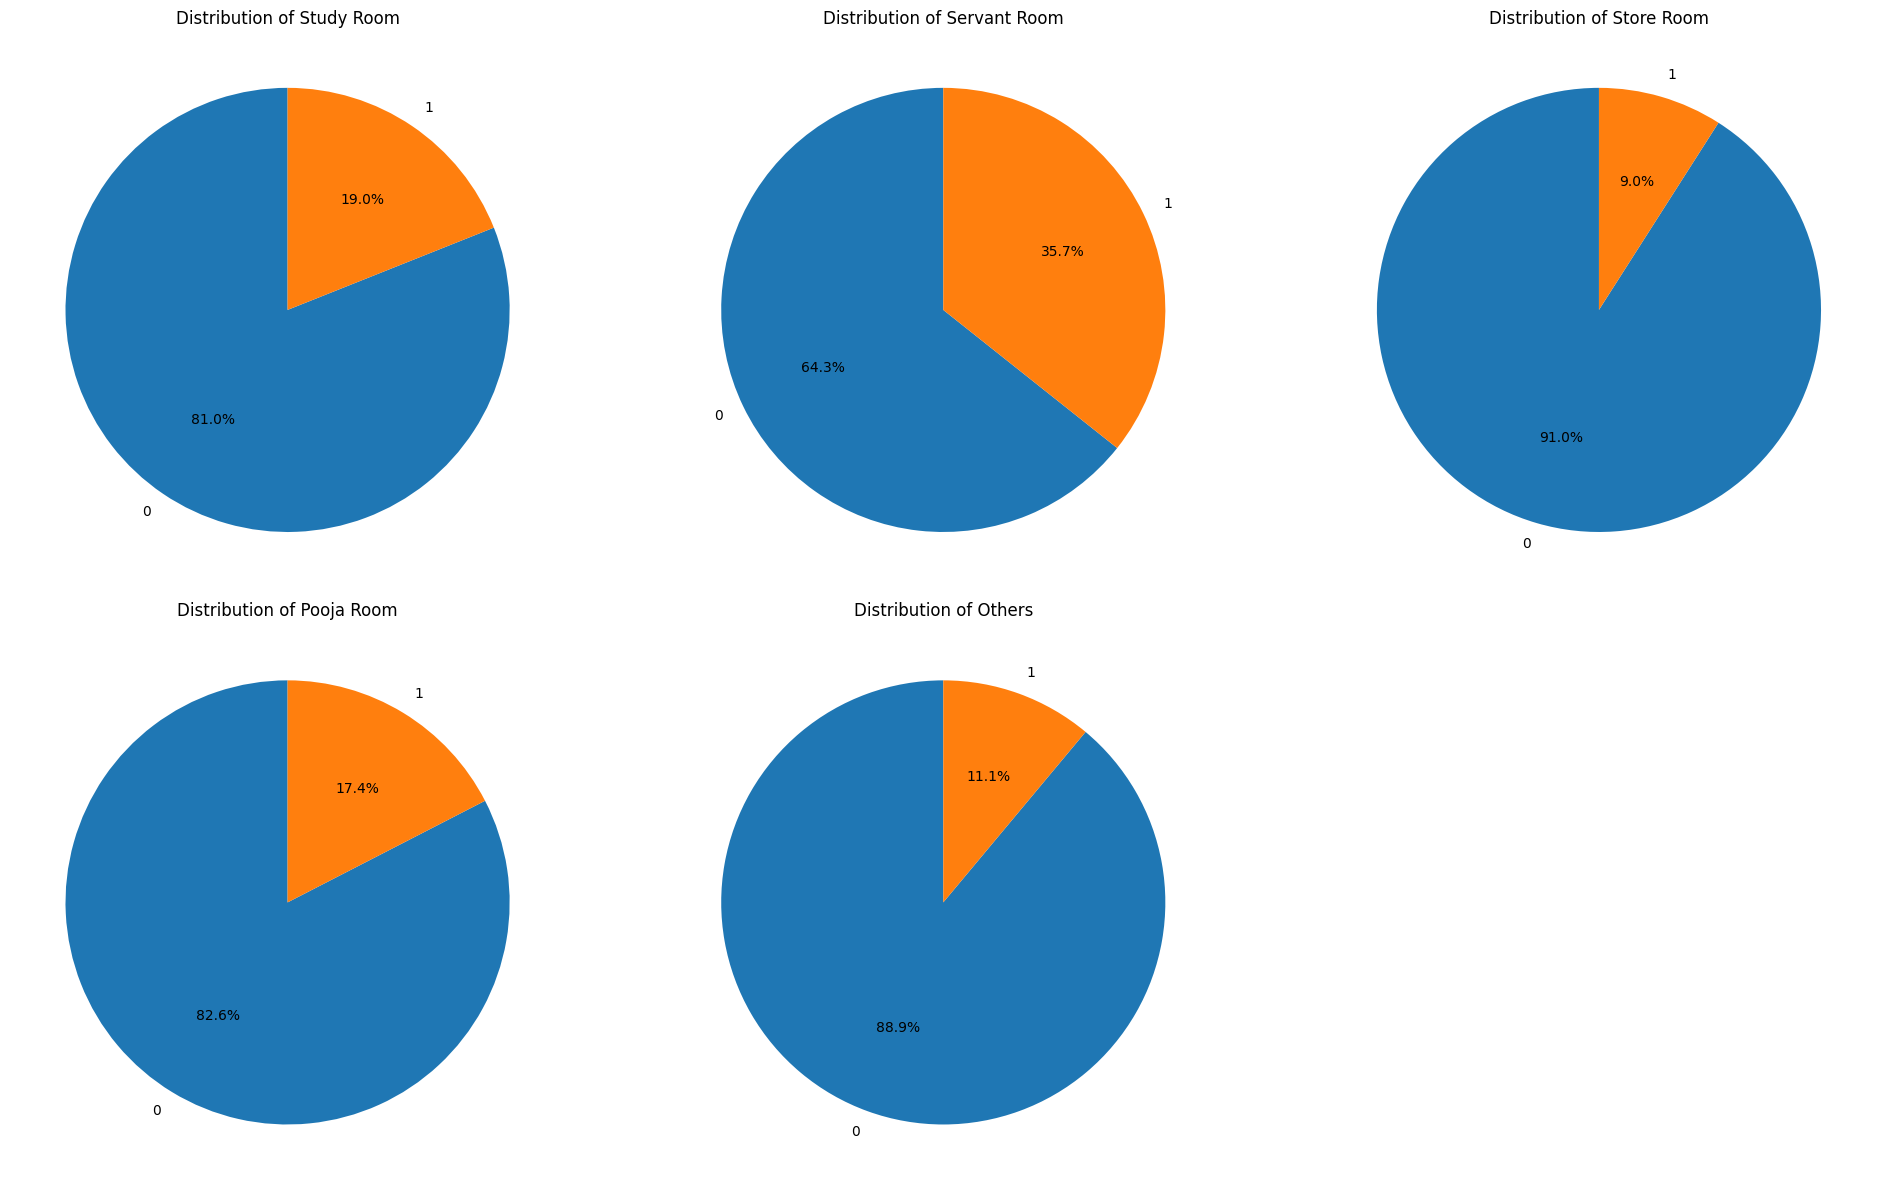

In [172]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    train_df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()